In [54]:
import numpy as no
import pandas as pd

In [55]:
data = pd.read_csv('../../data/food-texture.csv')

# Raw data

In [56]:
data.head()

,Unnamed: 0,Oil,Density,Crispy,Fracture,Hardness
0,B110,16.5,2955,10,23,97
1,B136,17.7,2660,14,9,139
2,B171,16.2,2870,12,17,143
3,B192,16.7,2920,10,31,95
4,B225,16.3,2975,11,26,143


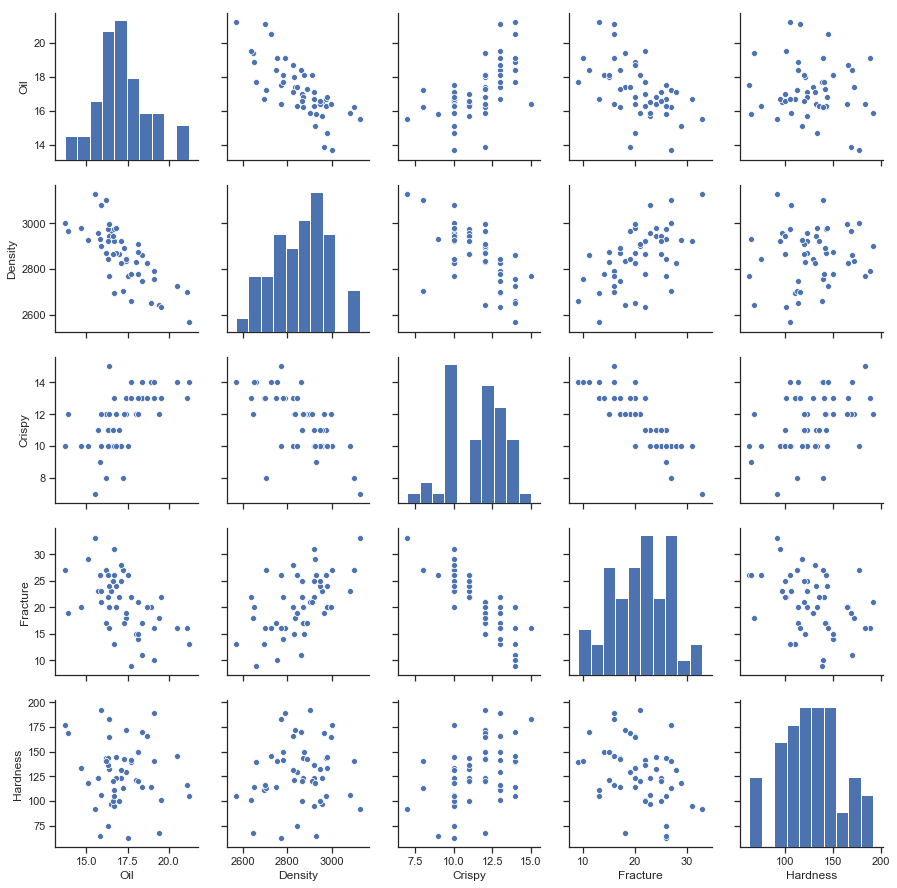

In [57]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
sns.pairplot(data)

In [58]:
X = data[["Oil","Density",'Crispy','Fracture','Hardness']].values

In [59]:
Xstd = (X-X.mean(axis=0))/X.std(axis=0,ddof=1)

In [60]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(Xstd)
P=pca.components_
T = Xstd.dot(P.T)

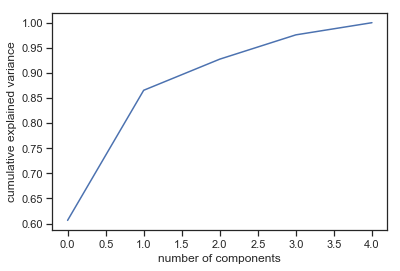

In [61]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

# Interpretation of loadings and scores
Loading $p_1$

First component  [-0.45753343  0.4787455  -0.53238767  0.50447688 -0.15340262]


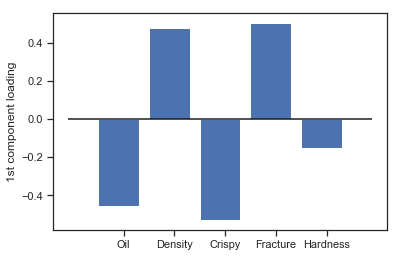

In [62]:
#Loading of the first component
print("First component ", P.T[:,0])
x = np.arange(5)
plt.bar(x, height= P.T[:,0])
plt.hlines(0,-1,5)
plt.xticks(x+.1, ["Oil","Density",'Crispy','Fracture','Hardness'])
plt.ylabel("1st component loading")
plt.show()

## Scores $t_1$
Writing out the equation for $t_1$ for an observation $i$:

$$𝑡_{i,1} = 0.46 𝑥_{oil} − 0.47 𝑥_{density} + 0.53 𝑥_{crispy} − 0.50 𝑥_{fracture} + 0.15 𝑥_{hardness}$$

Once we have centered and scaled the data, remember that a negative 𝑥-value is a value below the average, and that a positive 𝑥-value lies above the average.

For a pastry product to have a have low $t_{1}$ value would require it to have some combination of above-average oil level, low density, and/or be more crispy and/or only have a small angle by which it can be bent before it fractures, i.e. low fracturability. So pastry observations with low $𝑡_1$ values sound like they are brittle, flaky and light. Conversely, a product with low $𝑡_1$ value would have the opposite sort of conditions: it would be a heavier, more chewy pastry (higher fracture angle) and less crispy.

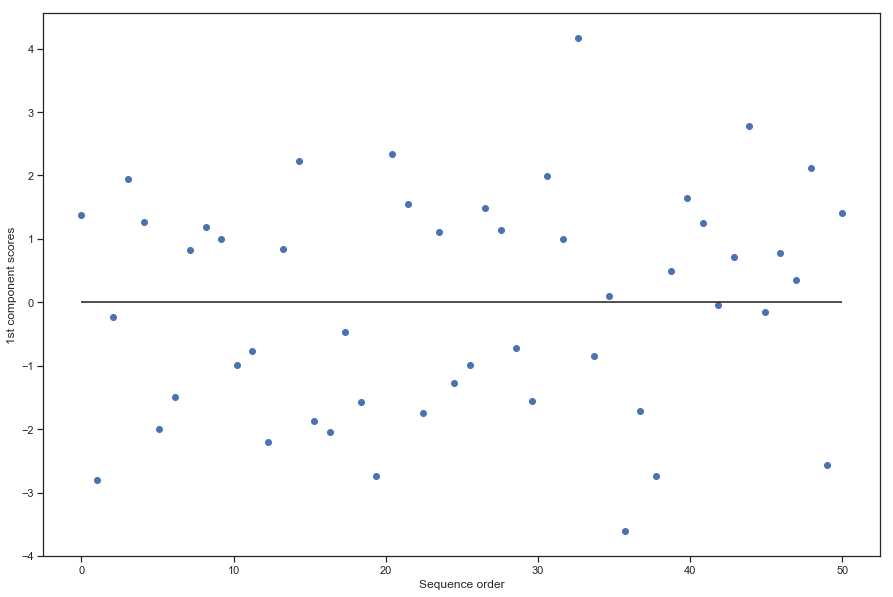

In [63]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(15,10))
plt.scatter(np.linspace(0,len(T)),T[:,0])
plt.hlines(0,0,50)
plt.xlabel('Sequence order')
plt.ylabel('1st component scores')
plt.show()

The samples appear to be evenly spread, some high and some low on the $𝑡_{1}$ scale. Sample 33 has a $𝑡_{1}$ value of 4.2, indicating it was much denser than the other pastries, and had a high fracture angle (it could be bent more than others). In fact, if we refer to the raw data we can confirm these findings: $x_{𝑖=33}$. 

In [64]:
X[32,:]

array([  15.5, 3125. ,    7. ,   33. ,   92. ])

Also refer back to the scatterplot matrix and mark the point which has density of 3125, and fracture angle of 33. This pastry also has a low oil percentage (15.5%) and low crispy value (7).

Second component  [ 0.37043885 -0.35674997 -0.19766103  0.22123992 -0.8046661 ]


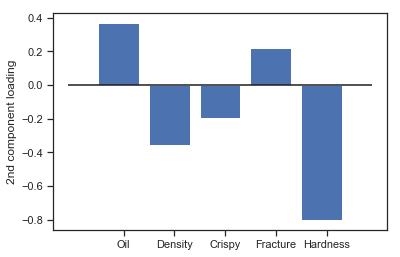

In [65]:
#Loading of the first component
print("Second component ", P.T[:,1])
x = np.arange(5)
plt.bar(x, height= P.T[:,1])
plt.hlines(0,-1,5)
plt.xticks(x+.1, ["Oil","Density",'Crispy','Fracture','Hardness'])
plt.ylabel("2nd component loading")
plt.show()

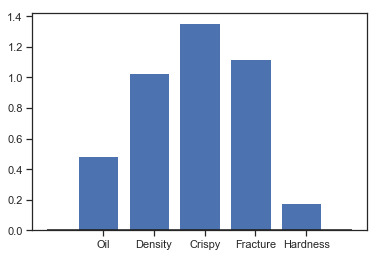

In [66]:
contributions=Xstd[32,:]*P[0,:]
x = np.arange(5)
plt.bar(x, height= contributions)
plt.hlines(0,-1,5)
plt.xticks(x+.1, ["Oil","Density",'Crispy','Fracture','Hardness'])
plt.show()

# Interpreting loadings and scores together

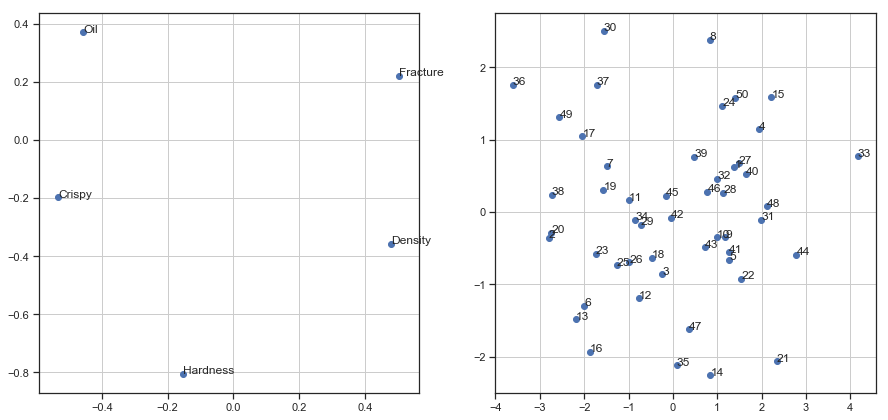

In [67]:
variables = ["Oil","Density",'Crispy','Fracture','Hardness']
n = np.linspace(1,len(Xstd)).astype(int)
n=n.tolist()

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15, 7))
ax1.scatter(P[0,:], P[1,:])
ax1.grid()
for i, txt in enumerate(variables):
    ax1.annotate(txt, (P[0,i], P[1,i]))
    
plt.grid()
#plt.show()

#fig, ax = plt.subplots()
ax2.scatter(T[:,0], T[:,1])
ax2.grid()
for i, txt in enumerate(n):
    ax2.annotate(txt,(T[i,0], T[i,1]))
plt.grid()
plt.show()

Side-by-side, these 2 plots very helpfully characterize all the observations in the data set. Recall observation 33 had a large, positive $t_{1}$ value. It had an above average fracture angle, an above average density, a below average crispiness value of 7, and below average oil level of 15.5. It is no coincidence that we can mentally superimpose these two plots and come to exactly the same conclusions, using only the plots. This result comes from the fact that the scores (left) are just a linear
combination of the raw data, with weighting given by the loadings (right).

# Excercise
## Interpret Sample 36
## Interpret the loadings $p_{2}$ and score $t_{2}$